# Analysis of the results

In [4]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [6]:
df = pd.read_csv("stats.csv")
df["instance"] = df.apply(lambda row: row["instance"].split(".")[0], axis=1)
# rename ILP
df["solver"] = df.apply(lambda row: "ILP" if row["solver"] == "ILP Solver (global):predictor (Python)" else row["solver"], axis=1)
# merge to separate columns by instance
bap = df[df["solver"] == "BAP"]            
ilp = df[df["solver"] == "ILP"]
df = pd.merge(bap, ilp, on="instance",suffixes=["_bap", "_ilp"])

df_all = df

In [7]:

print("Overall performance:")
for method in ["ilp", "bap"]:
    avg = df["time_" + method].mean() / 1000 # to s
    std = df["time_" + method].std() / 1000
    avg_nodes = df["metadata_bap"]
    print("time {:s} ${:4.2f} \pm {:4.2f}$".format(method, avg, std))    

# ILP was faster
df_cur = df[df["time_ilp"] < df["time_bap"]]
print(" - ilp was faster {:d} times".format(df_cur["instance"].count()))                
for method in ["ilp", "bap"]:
    avg = df_cur["time_" + method].mean() / 1000
    std = df_cur["time_" + method].std() / 1000
    print("   time {:s} ${:4.2f} \\pm {:4.2f}$".format(method, avg, std))    
bap_nodes_avg = df_cur["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"])).mean()
bap_nodes_min = df_cur["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"])).min()
bap_nodes_max = df_cur["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"])).max()
print("   bap nodes avg", bap_nodes_avg, "min", bap_nodes_min, "max", bap_nodes_max)


df_cur = df[df["time_ilp"] > df["time_bap"]]
print(" - bap was faster {:d} times".format(df_cur["instance"].count()))    
for method in ["ilp", "bap"]:
    avg = df_cur["time_" + method].mean() / 1000
    std = df_cur["time_" + method].std() / 1000
    print("   time {:s} ${:4.2f} \\pm {:4.2f}$".format(method, avg, std))    
bap_nodes_avg = df_cur["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"])).mean()
bap_nodes_min = df_cur["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"])).min()
bap_nodes_max = df_cur["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"])).max()
print("   bap nodes avg", bap_nodes_avg, "min", bap_nodes_min, "max", bap_nodes_max)

Overall performance:
time ilp $44.78 \pm 25.46$
time bap $46.09 \pm 26.49$
 - ilp was faster 42 times
   time ilp $46.95 \pm 24.26$
   time bap $50.52 \pm 24.04$
   bap nodes avg 49.30952380952381 min 1 max 223
 - bap was faster 5 times
   time ilp $26.53 \pm 30.95$
   time bap $8.90 \pm 14.52$
   bap nodes avg 16.2 min 1 max 69


In [8]:
bap_time = df["time_bap"]
ilp_time = df["time_ilp"]
bap_nodes = df["metadata_bap"].apply(lambda row: int(json.loads(row)["number_of_nodes"]))

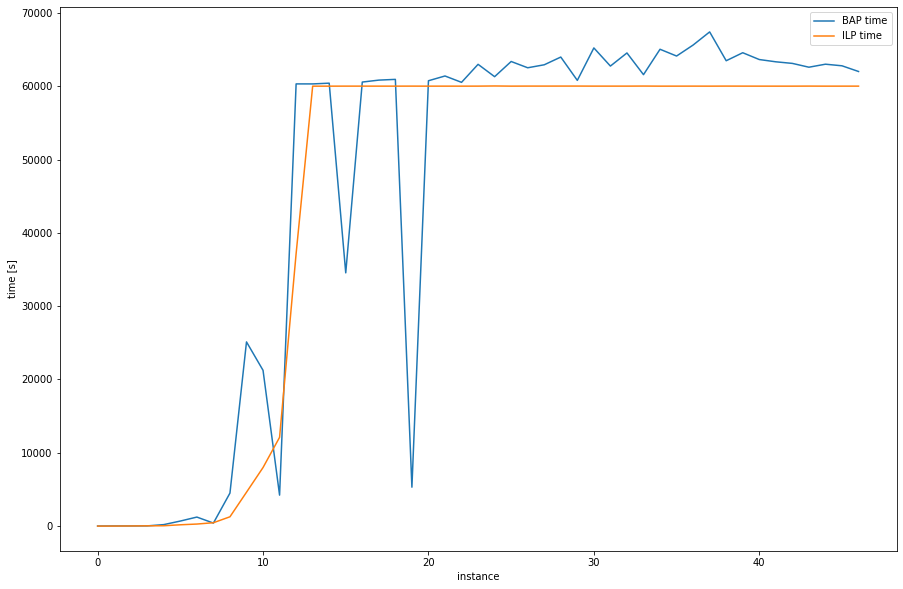

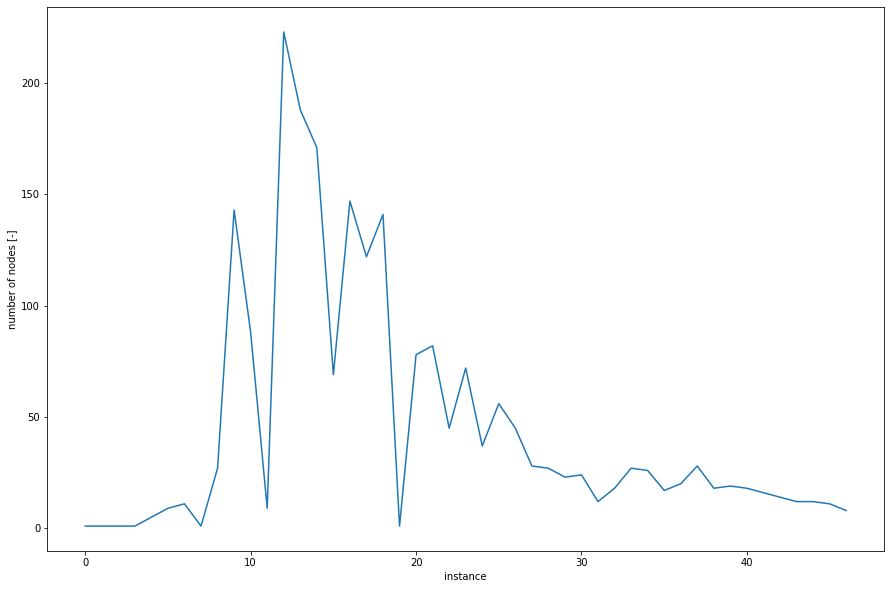

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(bap_time, label="BAP time")
plt.plot(ilp_time, label="ILP time")
plt.legend()

plt.xlabel("instance")
plt.ylabel("time [s]")
plt.show()

plt.figure(figsize=(15,10))
plt.plot(bap_nodes)
plt.xlabel("instance")
plt.ylabel("number of nodes [-]")
plt.show()